In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# B-Spline basis function

In [3]:
def bspline_sym(i, p, knot, xi, xval):
    """
    This function returns the B-Spline basis function with following data
    
    Input::
        i - Index of basis function.
        p - Degree of Spline.
        knot - Knot Vector
        xi - Symbolic value of xi
        xval - Parametric value
        
    Output:
        Symbolic expression of B-Spline Derivative
    """
    for j in range(0,p+1):
        if knot[j] !=0 or knot[-1-j] !=1:
            raise Exception("Please Enter Valid, Clamped Knot vector")
            
    if p==0:
        if xval==1:
            if knot[i]<=xval<=knot[i+1]:
                B=1       
            else:
                B=0
        else:
            if knot[i]<=xval<knot[i+1]:
                B=1       
            else:
                B=0
                
    elif p>0:
        d1 = (knot[i+p]-knot[i])
        d2 = (knot[i+p+1]-knot[i+1])
        if d1==0:
            b1 = 0
        else:
            b1 = ((xi-knot[i])/d1)*bspline_sym(i, p-1, knot, xi,xval)
        if d2==0:
            b2= 0
        else:
            b2 = ((knot[i+p+1]-xi)/d2)*bspline_sym(i+1, p-1, knot, xi,xval)

        B = b1+b2
    else:
        B=0
    
    return B

## Plotting Basis function

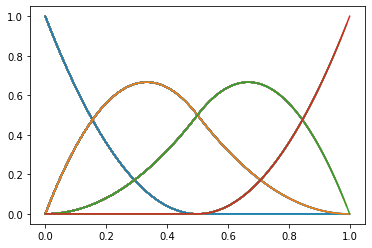

In [5]:
a = sp.Symbol('xi')
i = 1
p = 2
knot = [0,0,0,0.5,1,1,1]
span = 3
basis =bspline_sym(2, p, knot, a,0.75)

for i in range(0,4):
    par = [];
    bsp = []
    for x in range(0,101):
        basis =bspline_sym(i, p, knot, a,x/100)
        par.append(x/100)
        bsp.append(basis.subs(a,x/100))
        plt.plot(par,bsp)


In [6]:
basis = bspline_sym(0, p, knot, a,0.25)
basis

4.0*(0.5 - xi)**2

In [7]:
# Simplify the equation
sp.simplify(basis)

4.0*(xi - 0.5)**2

In [8]:
# Expand the Equation
basis.expand()

4.0*xi**2 - 4.0*xi + 1.0

## Element Basis functions

In [9]:
def unique(knot):
    unique_knot = []
    for i in knot:
        if i not in unique_knot:
            unique_knot.append(i)
    return unique_knot

In [10]:
def non_decreasing(knot):
    size = len(knot)
    for i in range(0,size):
        for j in range(i+1, size):
            if knot[i]>knot[j]:
                raise Exception('Please enter the knot decreasing knot vecotr')

In [15]:
def elbasis(p, knot, el):
    basis = []
    for i in range(0,p+1):
        basis.append(i)

    unq_knt = unique(knot)
    size = len(knot)
    span = unq_knt[el-1:el+1]
    
    cnt = 0
    for i in range(1,el):
        temp_knt = knot[p+i:size]
        for j in temp_knt:
            if unq_knt[i]==j:
                cnt = cnt+1
                
    for i in range(0,p+1):
        basis[i] = basis[i]+cnt
    
#     print(basis)
    return basis, span

In [16]:
elbasis(2, [0,0,0,0.33,0.33,0.5,1,1,1], 3)

([3, 4, 5], [0.5, 1])

In [17]:
def bspline_elem_basis(p, knt, xi, el):
    basis, span = elbasis(p, knt, el)
    xval = (span[0]+span[1])/2
    funcs = []
#     print(basis, span)
#     print(xval)
    for b in basis:
        funcs.append(bspline_sym(b,p,knot,xi,xval))
    return funcs

In [21]:
p = 2
knt = [0,0,0,0.5,1,1,1]
xi = sp.Symbol('xi')
el = 1
k  = bspline_elem_basis(p, knt, xi, el)
k[2]

2.0*xi**2

In [116]:
bspline_sym(0,p,knot,xi,0.25)

4.0*(0.5 - xi)**2

# B-spline derivative

In [69]:
def bspline_der(i,p,knot,xi,xval, n):
    """
    This function returns the n^th order derivative of B-Spline basis function with following data
    
    Input::
        i - Index of basis function.
        p - Degree of Spline.
        knot - Knot Vector
        xi - Symbolic value of xi
        xval - Parametric value
        n - Order of the derivative
        
    Output:
        Symbolic expression of n^th order derivative of B-Spline
    """
    if n==1:
        d1 = knot[i+p]-knot[i]
        if d1==0:
            B1 = 0
        else:
            B1 = (p/d1)*bspline_sym(i, p-1, knot, xi, xval)

        print(B1)

        d2 = knot[i+p+1]-knot[i+1]
        if d2==0:
            B2 = 0
        else:
            B2 = (p/d2)*bspline_sym(i+1, p-1, knot, xi, xval)
        print(B2)
        der = B1-B2
    else:
        d1 = knot[i+p]-knot[i]
        if d1==0:
            B1 = 0
        else:
            B1 = (p/d1)*bspline_der(i, p-1, knot, xi, xval,n-1)

        print(B1)

        d2 = knot[i+p+1]-knot[i+1]
        if d2==0:
            B2 = 0
        else:
            B2 = (p/d2)*bspline_der(i+1, p-1, knot, xi, xval,n-1)
        print(B2)
        der = B1-B2
        
    return der

# Calculating the Derivative

In [73]:
a = sp.Symbol('xi')
i = 2
p = 2
knot = [0,0,0,0.5,1,1,1]
xval = 0
bspline_der(i,p,knot,a,xval,2)

2.0
0.0
4.0
0.0
0
0.0


4.0

Fields in tree strucutre,
element volume, center, Density, objective function,
Topology functions,
Multi-Patch,
PHT geometry,
Topology Optimization,
Visualization,
VTU exporter,
Storing Iteration data in Tree Structure.

Filter Normal, Finding Neighbours are already in the Paper.


## Knot Insertion Algorithm

#### This algorithm allows the insertion of new knot value into knot vector by keeping the geometry Geometry same. This Operation is Geometry preserving algorithm.

In [3]:
p= 2;
P = [[0,0,0],[1,1,0],[2,0,0]]
knot = [0,0,0,1,1,1]

In [203]:
def knotinsertion(p,P,knot, values):
    
    # Checking the values is a list or not
    if type(values)!=list:
        raise Exception('Please enter the values as a list, even it has single value')

    new_P = [];
    new_knot = knot
    ks = []
    np = len(P)
    for val in values:
        alps = []
        if knot[0]<val<knot[-1]:
            for i in range(0,len(knot)-1):
                if knot[i]<=val and knot[i+1]>val:
                    ks.append(i)
                    print(ks)
                    k = i
                    print('K Values is',k)
                    np = np+1
                    for a in range(0,np):
                        if 0<=a<=k-p:
                            a1 = 1
                        elif k-p+1<=a<=k:
                            a1 = (val-knot[a])/(knot[a+p]-knot[a])
                        else:
                            a1 = 0
                        alps.append(a1)
                    print(alps)
                    knot.insert(i+1,val)
                    break
        else:
            raise Exception('Please inter the knot values in range 0 and 1')
    

        

In [207]:
p= 2;
P = [[0,0,0],[1,1,0],[2,0,0]]
knot = [0,0,0,1,1,1]
values = [0.5]
knotinsertion(p,P,knot,values)

[2]
K Values is 2
[1, 0.5, 0.5, 0]


## Degree Elevation

In [ ]:
def degree_elevation(p, knot):
    

In [208]:
from geomdl import NURBS

In [211]:
NURBS.BSpline.Curve

Help on class Curve in module geomdl.BSpline:

class Curve(geomdl.abstract.Curve)
 |  Curve(**kwargs)
 |  
 |  Data storage and evaluation class for n-variate B-spline (non-rational) curves.
 |  
 |  This class provides the following properties:
 |  
 |  * :py:attr:`type` = spline
 |  * :py:attr:`id`
 |  * :py:attr:`order`
 |  * :py:attr:`degree`
 |  * :py:attr:`knotvector`
 |  * :py:attr:`ctrlpts`
 |  * :py:attr:`delta`
 |  * :py:attr:`sample_size`
 |  * :py:attr:`bbox`
 |  * :py:attr:`vis`
 |  * :py:attr:`name`
 |  * :py:attr:`dimension`
 |  * :py:attr:`evaluator`
 |  * :py:attr:`rational`
 |  
 |  The following code segment illustrates the usage of Curve class:
 |  
 |  .. code-block:: python
 |  
 |      from geomdl import BSpline
 |  
 |      # Create a 3-dimensional B-spline Curve
 |      curve = BSpline.Curve()
 |  
 |      # Set degree
 |      curve.degree = 3
 |  
 |      # Set control points
 |      curve.ctrlpts = [[10, 5, 10], [10, 20, -30], [40, 10, 25], [-10, 5, 0]]
 |  
